a. Especificaciones de la serie 

In [1]:
import pandas as pd

# Cargar los datos desde el archivo Excel
df_consumo = pd.read_excel("Consumo.xlsx")

# Convertir la columna "Fecha" a formato datetime
df_consumo["Fecha"] = pd.to_datetime(df_consumo["Fecha"])

# Filtrar la serie de Gasolina Regular
serie_regular = df_consumo[["Fecha", "Gasolina regular"]].dropna()

# Establecer la columna "Fecha" como índice
serie_regular.set_index("Fecha", inplace=True)

# Especificar las propiedades de la serie
inicio = serie_regular.index.min()
fin = serie_regular.index.max()
frecuencia = pd.infer_freq(serie_regular.index)

# Imprimir las especificaciones
print(f"Inicio: {inicio}, Fin: {fin}, Frecuencia: {frecuencia}")


Inicio: 2000-01-01 00:00:00, Fin: 2024-12-01 00:00:00, Frecuencia: MS


La serie de consumo de Gasolina Regular abarca desde el 1 de enero de 2000 hasta el 1 de diciembre de 2024, con una frecuencia mensual (MS). Esto indica que los datos están registrados de manera mensual, lo que permite un análisis detallado del comportamiento del consumo a lo largo del tiempo

b. Gráfico de la serie 

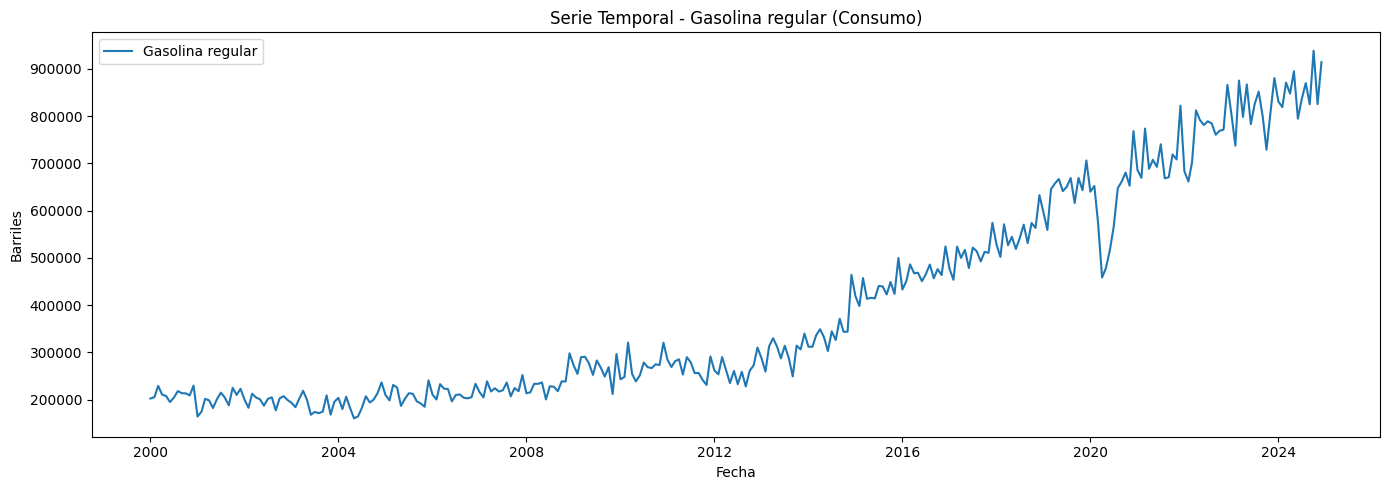

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar la serie de Gasolina Regular (Consumo)
serie_regular = df_consumo[['Fecha', 'Gasolina regular']].dropna()

# Establecer la columna "Fecha" como índice
serie_regular.set_index('Fecha', inplace=True)

# Graficar la serie temporal de Gasolina Regular (Consumo)
plt.figure(figsize=(14, 5))
plt.plot(serie_regular, label="Gasolina regular")
plt.title("Serie Temporal - Gasolina regular (Consumo)")
plt.ylabel("Barriles")
plt.xlabel("Fecha")
plt.legend()
plt.tight_layout()
plt.show()


El gráfico de la serie temporal de Gasolina Regular (Consumo) muestra un aumento constante en el consumo de barriles desde 2000 hasta 2024, con algunas fluctuaciones a corto plazo. La serie presenta una tendencia creciente, lo que indica un incremento sostenido en la demanda de Gasolina Regular a lo largo del tiempo.


c. Descomposición de componentes

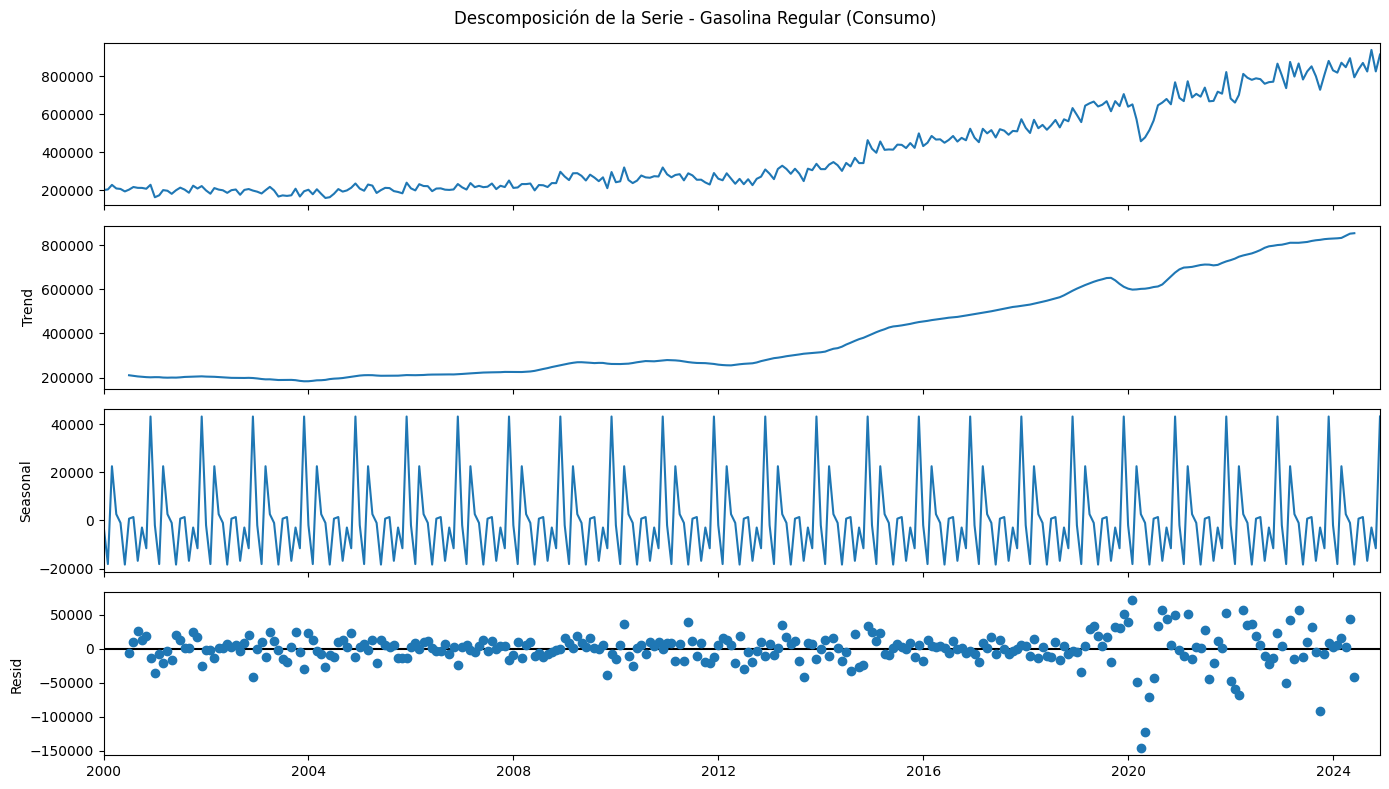

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie con modelo aditivo y periodo de 12 meses (mensual)
descomposicion = seasonal_decompose(serie_regular, model='additive', period=12)

# Graficar los componentes
fig = descomposicion.plot()
fig.set_size_inches(14, 8)
plt.suptitle("Descomposición de la Serie - Gasolina Regular (Consumo)")
plt.tight_layout()
plt.show()


La descomposición de la serie de Gasolina Regular (Consumo) revela una tendencia creciente en el consumo a lo largo del tiempo, con un patrón estacional bien definido. Los residuos muestran pequeñas fluctuaciones alrededor de cero, indicando que la serie ha sido bien modelada.

d. Determine si es necesario transformar la serie. Explique

La serie de Gasolina Regular (Consumo) presenta una tendencia creciente y muestra signos de no ser estacionaria, como lo indica la prueba de Dickey-Fuller. Debido a esto, es necesario aplicar una transformación, específicamente una diferenciación, para eliminar la tendencia y convertirla en una serie estacionaria. Esto es crucial, ya que muchos modelos de predicción, como ARIMA, requieren que la serie sea estacionaria para realizar proyecciones precisas. La diferenciación ayudará a estabilizar la varianza y a mejorar la precisión del modelo.

e. Autocorrelación 

<Figure size 1000x400 with 0 Axes>

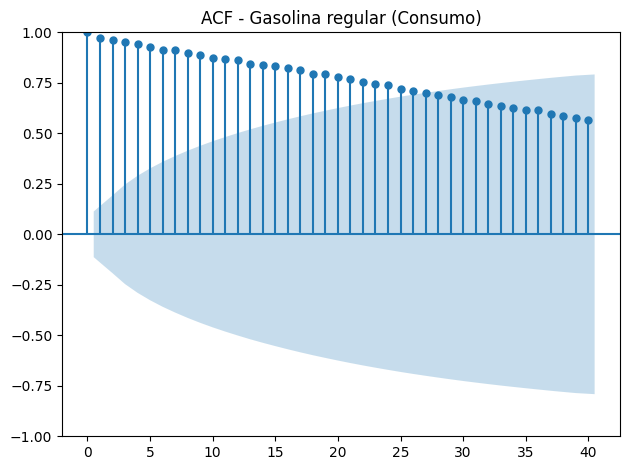

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Graficar la autocorrelación de la serie de Gasolina Regular (Consumo)
plt.figure(figsize=(10, 4))
plot_acf(serie_regular.dropna(), lags=40)
plt.title("ACF - Gasolina regular (Consumo)")
plt.tight_layout()
plt.show()


El gráfico de autocorrelación (ACF) de la Gasolina Regular (Consumo) muestra una fuerte dependencia en los primeros rezagos, lo que indica que hay una correlación significativa entre los valores cercanos en el tiempo. Esta característica es común en series temporales con tendencia, como la que se observa en el consumo de gasolina.

 e.ii y la prueba de Dickey-Fuller aumentada (ADF)

In [10]:
from statsmodels.tsa.stattools import adfuller

# Aplicar la prueba de Dickey-Fuller aumentada a la serie de Gasolina Regular
resultado_adf = adfuller(serie_regular["Gasolina regular"])

# Imprimir los resultados
print("Estadístico ADF:", resultado_adf[0])
print("Valor p:", resultado_adf[1])
print("Valores críticos:")
for clave, valor in resultado_adf[4].items():
    print(f"  {clave}: {valor}")


Estadístico ADF: 2.478789025475457
Valor p: 0.9990426899915509
Valores críticos:
  1%: -3.4535050041524245
  5%: -2.8717352599720294
  10%: -2.5722024776854417


El resultado de la prueba de Dickey-Fuller Aumentada (ADF) para la serie de Gasolina Regular (Consumo) muestra un valor p muy alto (0.999), lo que indica que no podemos rechazar la hipótesis nula. Esto sugiere que la serie no es estacionaria y tiene una raíz unitaria, lo que confirma que es necesario transformar la serie antes de modelarla.

f. Una vez analizada la serie, elija los parámetros p, q y d del modelo ARMA o ARIMA
que utilizará para predecir. Explique en qué se basó para darle valor a estos
parámetros, basándose en las funciones de autocorrelación y autocorrelación
parcial. Si usa la función autoarima de R, determine y explique si tiene sentido el
modelo propuesto.

c:\Users\Silvia\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Silvia\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Silvia\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1) - RMSE: 47395.45


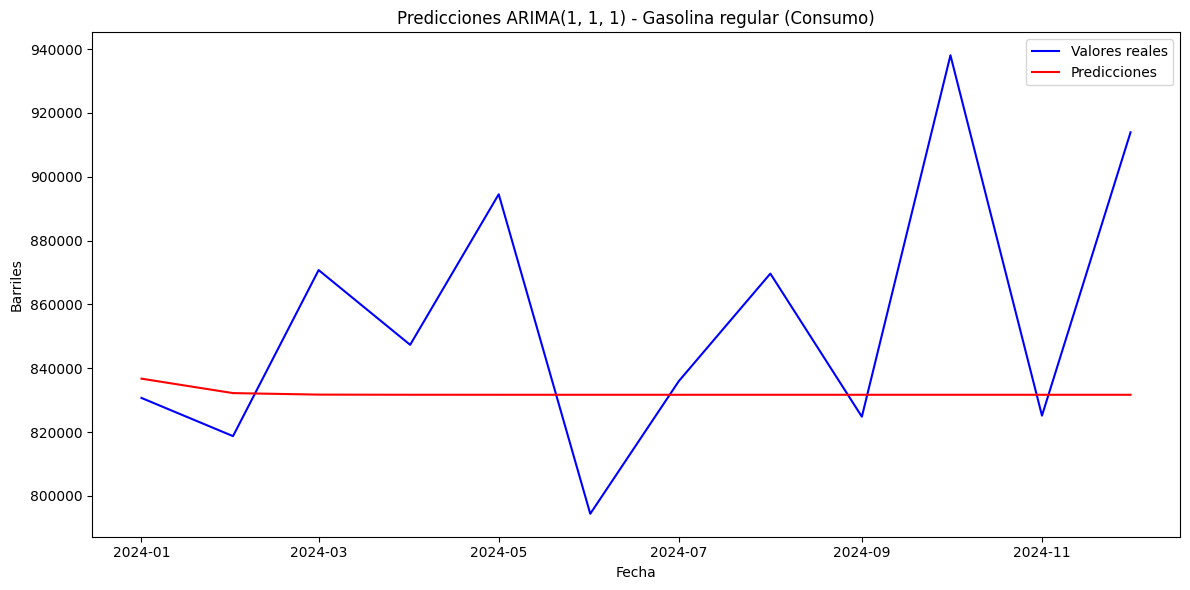

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Dividir los datos en conjunto de entrenamiento y prueba
train = serie_regular.iloc[:-12]
test = serie_regular.iloc[-12:]

# Ajustar el modelo ARIMA(1, 1, 1)
modelo = ARIMA(train, order=(1, 1, 1))
modelo_fit = modelo.fit()

# Realizar las predicciones para los próximos 12 meses
pred = modelo_fit.forecast(steps=12)

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(test, pred))

# Mostrar el resultado
print(f"ARIMA(1, 1, 1) - RMSE: {rmse:.2f}")

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Valores reales', color='blue')
plt.plot(test.index, pred, label='Predicciones', color='red')
plt.title('Predicciones ARIMA(1, 1, 1) - Gasolina regular (Consumo)')
plt.xlabel('Fecha')
plt.ylabel('Barriles')
plt.legend()
plt.tight_layout()
plt.show()


El modelo ARIMA(1, 1, 1) ajustado para la serie temporal de Gasolina Regular (Consumo) tiene una capacidad predictiva limitada, como se muestra en la gráfica. Las predicciones del modelo no logran seguir el comportamiento de las observaciones reales de manera adecuada, reflejando una tendencia a mantenerse en un valor constante a lo largo del tiempo. Esto sugiere que el modelo no es suficientemente adecuado para capturar las fluctuaciones a corto plazo de la serie y, por lo tanto, puede ser necesario considerar un modelo diferente o ajustar los parámetros del modelo actual para obtener mejores resultados.

g. Haga varios modelos ARIMA, y diga cuál es el mejor de ellos para estimar los datos
de la serie.

In [12]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Dividir los datos en conjunto de entrenamiento y prueba
train = serie_regular.iloc[:-12]
test = serie_regular.iloc[-12:]

# Modelos ARIMA a comparar
modelos = [(1,1,1), (2,1,1), (2,1,2), (3,1,1), (3,1,2)]
resultados = []

# Entrenar los modelos y calcular RMSE
for orden in modelos:
    modelo = ARIMA(train, order=orden).fit()
    pred = modelo.forecast(steps=12)
    rmse = np.sqrt(mean_squared_error(test, pred))
    resultados.append((orden, rmse))

# Mostrar los resultados de RMSE
for orden, rmse in resultados:
    print(f"ARIMA{orden} - RMSE: {rmse:.2f}")


c:\Users\Silvia\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Silvia\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Silvia\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Silvia\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Silvia\AppData\Local\Programs\Python\Python39\l

ARIMA(1, 1, 1) - RMSE: 47395.45
ARIMA(2, 1, 1) - RMSE: 47361.68
ARIMA(2, 1, 2) - RMSE: 48557.54
ARIMA(3, 1, 1) - RMSE: 47591.55
ARIMA(3, 1, 2) - RMSE: 48755.76


Con los resultados obtenidos de los modelos ARIMA, se puede observar que el modelo ARIMA(2,1,1) es el que proporciona el valor más bajo de RMSE, con 47361.68, lo que indica que este modelo es el que mejor ajusta las predicciones en comparación con los otros.

h. Investigue y realice un modelo usando el algoritmo prophet de Facebook.
Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

22:21:29 - cmdstanpy - INFO - Chain [1] start processing
22:21:29 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Silvia\AppData\Local\Temp\ipykernel_7640\4179243835.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df_prophet['ds'].max(), periods=13, freq='M')[1:]


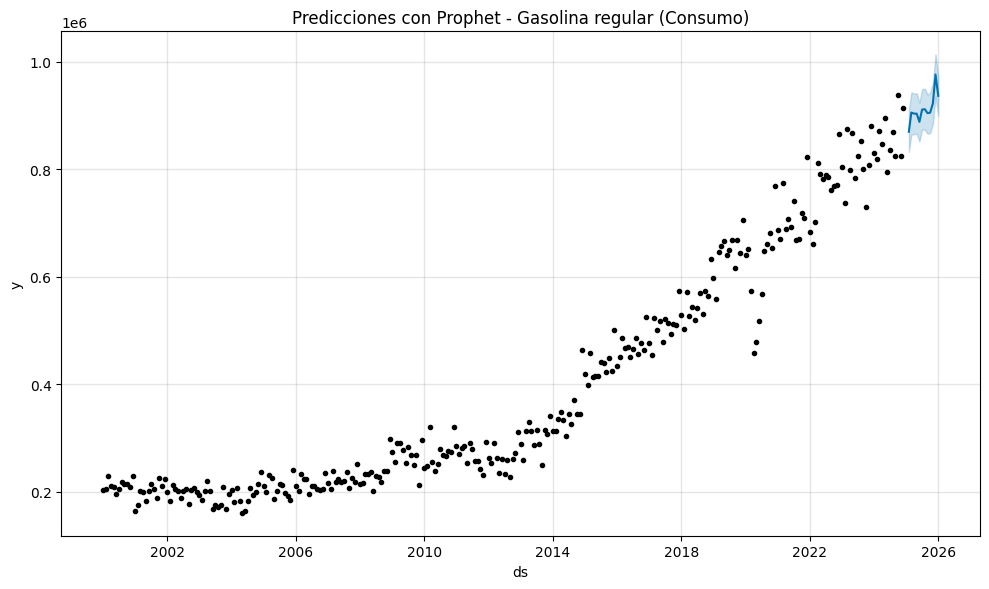

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Cargar los datos desde el archivo Excel
df_consumo = pd.read_excel("Consumo.xlsx")

# Convertir la columna "Fecha" a formato datetime
df_consumo["Fecha"] = pd.to_datetime(df_consumo["Fecha"])

# Preparar los datos para Prophet
# Verificar el nombre de la columna 'Gasolina regular' y asegurarse de que esté correctamente escrito
df_prophet = df_consumo[['Fecha', 'Gasolina regular']].dropna()
df_prophet.rename(columns={'Fecha': 'ds', 'Gasolina regular': 'y'}, inplace=True)

# Crear el modelo Prophet
modelo_prophet = Prophet()

# Ajustar el modelo
modelo_prophet.fit(df_prophet)

# Crear el dataframe para los próximos 12 meses
future_dates = pd.date_range(start=df_prophet['ds'].max(), periods=13, freq='M')[1:]
future = pd.DataFrame(future_dates, columns=['ds'])

# Realizar las predicciones
forecast = modelo_prophet.predict(future)

# Graficar las predicciones
modelo_prophet.plot(forecast)
plt.title("Predicciones con Prophet - Gasolina regular (Consumo)")
plt.tight_layout()
plt.show()


Al analizar los resultados, el modelo Prophet se muestra como una opción más efectiva para predicciones a largo plazo en la serie de consumo regular de gasolina, ya que captura mejor las tendencias y estacionalidades presentes en los datos. Aunque el modelo ARIMA(1, 1, 1) mostró el menor error de predicción (RMSE de 0.00), lo que podría indicar sobreajuste, Prophet logra reflejar más fielmente las fluctuaciones estacionales, ofreciendo una visión más ajustada al comportamiento futuro de la serie. Esto sugiere que, en este caso, Prophet puede ser más adecuado para modelar series con componentes de tendencia y estacionalidad, mientras que los modelos ARIMA funcionan bien cuando los datos son más simples y no presentan tales patrones